# DS Methodology : Random Forests

##### Author information
- Name: Jiyoon Yeom
- email address: 22100446@handong.ac.kr
- GitHub: ouzsaengmuel
- Youtube URL: https://www.youtube.com/@yjiwuggy

#### Part 1. Brief background of methodology
- Explain the situation before this methodology was introduced.

Classification algorithm learns from the training set and builds a model. The model, which is called a classifier, is then applied to testing set to predict the class labels for the unclassified objects.

There is also a concept called ensemble classification that contrasts with single classification. The ensemble classification uses multiple classifiers described above and collectively uses them to identify unclassified objects.

Even before the introduction of random forests, there were several classification algorithms in the field of data science, including logistic regression, k-NN, and SVM.

Among the existing classification algorithms, there was also a tree-based algorithm called decision tree. A single decision tree divides the data according to the conditions, ultimately predicting the class.

- Explain why this methodology is introduced and where it can be used.

The making of decision tree varies greatly depending on the training dataset. This can cause an overfitting problem. If an overfit tree is created, there is a high probability that the predictions of tree will be less accurate when the tree model is applied to the test dataset later. 

Therefore, there is a great disadvantage that a single decision tree is difficult to generalize and use.

To overcome the limitation of single decision tree, suggestions have begun to emerge that ensemble classification should be applied to decision trees. So, the random forest with an ensemble classification technique applied to decision tree was developed by Leo Breiman in 2001.


#### Part 2. Key concept of methodology
- Explain the key concept of the methodology with mathematical equations.

Random Forest is a collection of multiple random decision trees.

<img src="RF_image.png" alt="Random Forest Image" width="700"/>

The overall process can be described as bagging, the bootstrap aggregating.

Bagging = Bootstrap + Aggregation

1) Bootstrap

Bootstrapping refers to the random generation of new datasets from original data.
By using randomly created datasets, instead of using the same data for each tree, it has the effect of helping the tree to be less sensitive to original data. The lower sensitivity of the tree to the original data contributes to solving the tree's overfitting problem.

2) Aggregation

Aggregation means collecting the results of all trees.
After collecting all the results of the trees, each with a different dataset as an input, the final result is obtained by majority vote.

3) Random Feature Selection

Another important point of random forest is random feature selection. When there are multiple features that make up the data, the tree does not learn using all the features of the original data, but uses some randomly selected features. 

After features are randomly selected, the Gini impurity is calculated for the selected features.
Once the feature with the lowest Gini impurity is defined, the feature is based on splitting nodes in the tree.

$$
\text{Gini Impurity Index} = 1 - \sum_{i=1}^{C} p(i)^2
$$
<small>p(i) means the proportion of class i in all classes.</small>

The higher the Gini index is calculated because the values of p(i) are smaller as several classes are mixed. In this case, the nodes need to be further divided. Thus, the more features are selected in the direction of minimizing the Gini Index, the better the performance tree can be made.

So, the Gini impurity index is used as a baseline for splitting node, and combined with random feature selection, it improves the diversity and reduces the risk of overfitting.


4) Generalization Error

The primary objective of implementing decision trees as ensemble techniques rather than as a single tree is to generalize tree model. The generalization error can be expressed in the following formula.

$$
PE^* = P_{X,Y}(mg(X,Y) < 0)
$$

mg(X,Y) represents the margin function, as shown in the following formula.

$$
mg(X,Y) = \text{av}_k I(h_k(X) = Y) - \max_{j \neq Y} \text{av}_k I(h_k(X) = j)
$$

This margin equals to the average number of votes when classifier h(k) classifies data X as Y, which is the correct answer, minus the largest number of votes when classifier h(k) classifies it as j, which is not the correct answer. Therefore, the margin function indicates how many times that classifier has been correctly classified than it has been misclassified. The larger the margin, the higher the reliability of classification.

Let's go back to the generalization error formula. The generalization error is the probability when the margin value is less than 0. The fact that the margin value is less than zero means that the model made a lot of false classifications.

The generalization error has the following upper bounds by mathematical proofs.

$$
PE^* \leq \bar{p} \frac{(1 - s^2)}{s^2}
$$
<small>p means the value of the correlation of each classifier (tree).</small><br>
<small>s means the strength of the classifiers.</small>

The smaller the correlation between the classifiers and the greater the strength of the individual classifiers, the less generalization error.

This equation shows the effect of the correlation and the strength of the classifiers on the performance of the model. Therefore, we find that it is very important to consider correlation and strength of classifiers in order to properly implement random forest whose main purpose is generalization.

5) Brief Summary

To summarize, bagging is the most important concept for implementing random forests. Bagging is a combination of bootstrap and aggregation, which means randomly generating datasets to apply to each tree, operating the decision tree, and organizing the results with a majority vote to determine the final result. And when dividing the nodes that make up the tree, it should be done in a way that minimizes the Gini index, and the correlation between trees should be low to minimize generalization errors.


- Explain the main strength of the methodology. 

In random forest, "forest" means that it is made up of multiple decision trees, not just one. To understand why the forest is random forest, we need to understand two characteristics of random forest.

1) Randomness in Bootstrap

When bootstrap is performed, several data sets are randomly selected from the original data and different training data are assigned to each tree based on it. So, the variation of the tree can be lowered. It is a point that can overcome the overfitting problem, which was the biggest disadvantage of a single decision tree.

2) Random Features Selection

Rather than constructing a tree using all the features in the original data, features are randomly selected with different numbers. It helps to reduce the correlation between trees and, furthermore, to reduce generalization errors.



#### Part 3. Example
- Using a very simple toy data, write down a sample code.
- You must present the result, what it means, and how it can be used.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Data Load
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
diabetes_data = pd.read_csv(url, names=columns)

print(diabetes_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


- Pima Indians Diabetes Dataset

This dataset is widely used to train classification algorithm model in machine learning with data collected for the prediction of diabetes development in Pima Indian women. It consists of 768 samples and nine columns.

Pregnancies: Number of pregnancies

Glucose: glucose concentration

BloodPressure: blood pressure (mm Hg)

SkinThickness: skin thickness (mm)

Insulin: insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: likelihood of diabetes based on family history

Age: Age

Outcome: 0 = non-diabetic, 1 = diabetic



In [14]:
X = diabetes_data.drop('Outcome', axis=1) 
y = diabetes_data['Outcome']              

# Splitting the original data into training set and test set
# 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest
# n_estimators =  the # of trees in the forest.
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model on the training set
model.fit(X_train, y_train)

# Making predictions of 'Outcome' column on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print(classification_report(y_test, y_pred))  


Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



$$
\text{Precision} = \frac{TP}{TP + FP}
$$

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

$$
\text{F1-score} = \frac{2 \times (\text{Precision} \times \text{Recall})}{\text{Precision} + \text{Recall}}
$$

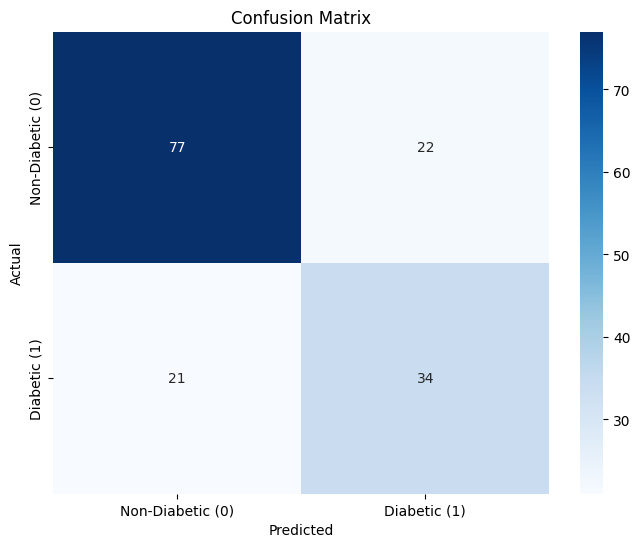

In [15]:
# Visualize the TP,TN,FP,FN

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Diabetic (0)', 'Diabetic (1)'], 
            yticklabels=['Non-Diabetic (0)', 'Diabetic (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


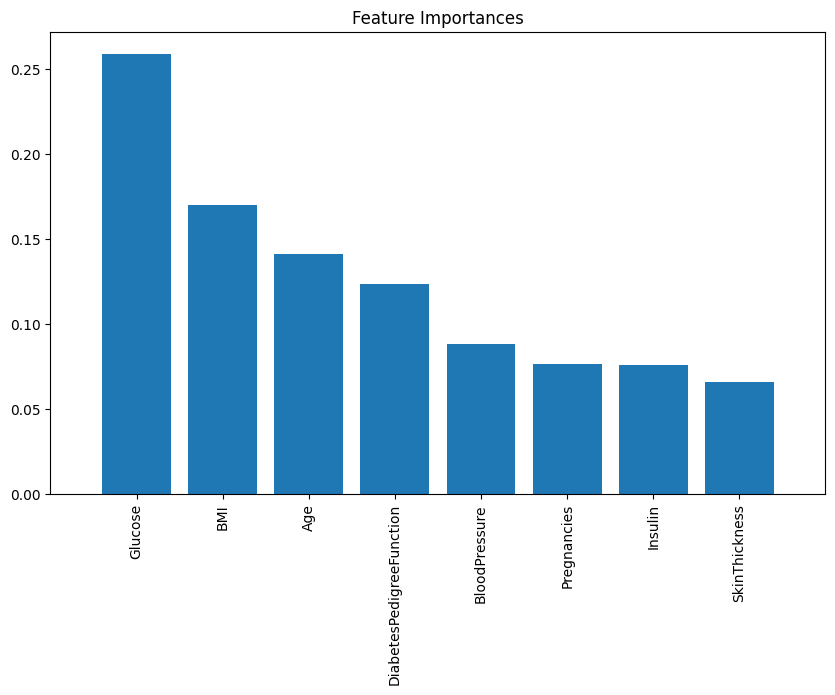

In [16]:
# Visualize the importance of features

import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


1) Interpretation of results

Looking at the precision, 79% of the 99 predicted by the model as 0(non-diabetic) are indeed 0.
Looking at recall, model predicted 78% of the 99 that are real 0(non-diabatic).
Looking at the f1-score, the precision and recall are balanced at 0(non-diabetic), however the performance for 1(diabetic) is relatively low at 0.61.
Looking at the accuracy, 72% of the total 154 samples were correctly predicted.

2) Evaluation of the random forest model

The model shows relatively good performance for 0(non-diabetic), but relatively low performance for 1(diabetic). In particular, class 1's Precision and Recall are low, so it may often miss diabetics. Such characteristics are also represented in the confusion matrix. Model improvements may be necessary.

By referring to feature's importance visualization, it is expected that additional studies on glucose, bmi index, age, family history data, and the possibility of diabetes can be conducted.

In [8]:
# n_estimators =  the # of trees in the forest
# criterion = 'gini' (criterion of node split)
# max_depth of each tree. The deeper, the more complex. But, if it is too deep, overfitting risk exists.
model_2 = RandomForestClassifier(
            n_estimators = 1000,
            criterion = 'gini',
            min_samples_split = 10,
            max_depth = 14,
            random_state = 42
)

model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))

Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



1) Evaluation of the random forest model 2 with adjusting hyper-parameters

As a result of training with the second model by adjusting the hyper-parameters a little, the prediction accuracy for 0(non-diabetic) is still high. Although the prediction accuracy for 1(diabetic) is higher than before, it still seems to need improvement.

- Random Forests Applications

1) Random Forest in Biological Science

Random forest classification may be used to predict the occurrence of a specific disease based on the patient's diagnostic data as in the example above.

2) Random Forest in Sports

Random forest can also be used to analyze sports game data to establish the optimal strategy for a particular team(Determination of attack or defense strategies). It can also be applied to deciding whether to renew the contract or buy another player by analyzing the player's performance and checking whether the team needs the player.

3) Random Forest in Finance

Random forest can be used to evaluate credit risk by analyzing the income, debt, and credit data of the person who applied for the loan, and then to determine whether to approve the loan. It can also be useful to analyze financial data, such as past returns and costs, and use it to predict future cash flows and build a budget.
